<a href="https://colab.research.google.com/github/ivanbintangs/PEMROGRAMAN-KOMPUTER/blob/main/K_Prototype_for_Mixed_Datatypes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!pip install kmodes

In [62]:
import numpy as np
import pandas as pd

from kmodes.kprototypes import KPrototypes

In [63]:
marketing_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/marketing_cva_f.csv')

In [64]:
marketing_df

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507
...,...,...,...,...,...,...,...,...,...,...,...,...
6812,TF56202,California,5032.165498,Basic,66367,Suburban,64,6,48,307.200000,Two-Door Car,37.492591
6813,YM19146,California,4100.398533,Premium,47761,Suburban,104,16,58,541.282007,Four-Door Car,48.946675
6814,LA72316,California,23405.987980,Basic,71941,Urban,73,18,89,198.234764,Four-Door Car,65.310053
6815,PK87824,California,3096.511217,Extended,21604,Suburban,79,14,28,379.200000,Four-Door Car,48.002914


In [65]:
marketing_df=marketing_df.drop(['Customer','Vehicle_Class','avg_vehicle_age','months_last_claim','Total_Claim_Amount'],axis=1)

In [66]:
marketing_df

,State,CLV,Coverage,Income,loc_type,monthly_premium,Months_Since_Policy_Inception
0,Washington,2763.519279,Basic,56274,Suburban,69,5
1,Nevada,12887.431650,Premium,48767,Suburban,108,38
2,Washington,2813.692575,Basic,43836,Rural,73,44
3,Oregon,8256.297800,Basic,62902,Rural,69,94
4,Oregon,5380.898636,Basic,55350,Suburban,67,13
...,...,...,...,...,...,...,...
6812,California,5032.165498,Basic,66367,Suburban,64,48
6813,California,4100.398533,Premium,47761,Suburban,104,58
6814,California,23405.987980,Basic,71941,Urban,73,89
6815,California,3096.511217,Extended,21604,Suburban,79,28


In [67]:
mark_array=marketing_df.values

In [68]:
mark_array

array([['Washington', 2763.519279, 'Basic', ..., 'Suburban', 69, 5],
       ['Nevada', 12887.43165, 'Premium', ..., 'Suburban', 108, 38],
       ['Washington', 2813.692575, 'Basic', ..., 'Rural', 73, 44],
       ...,
       ['California', 23405.98798, 'Basic', ..., 'Urban', 73, 89],
       ['California', 3096.511217, 'Extended', ..., 'Suburban', 79, 28],
       ['California', 7524.442436, 'Extended', ..., 'Suburban', 96, 3]],
      dtype=object)

In [69]:
mark_array[:, 1] = mark_array[:, 1].astype(float)
mark_array[:, 3] = mark_array[:, 3].astype(float)
mark_array[:, 5] = mark_array[:, 5].astype(float)
mark_array[:, 6] = mark_array[:, 6].astype(float)

In [70]:
mark_array

array([['Washington', 2763.519279, 'Basic', ..., 'Suburban', 69.0, 5.0],
       ['Nevada', 12887.43165, 'Premium', ..., 'Suburban', 108.0, 38.0],
       ['Washington', 2813.692575, 'Basic', ..., 'Rural', 73.0, 44.0],
       ...,
       ['California', 23405.98798, 'Basic', ..., 'Urban', 73.0, 89.0],
       ['California', 3096.511217, 'Extended', ..., 'Suburban', 79.0,
        28.0],
       ['California', 7524.442436, 'Extended', ..., 'Suburban', 96.0,
        3.0]], dtype=object)

In [71]:
kproto = KPrototypes(n_clusters=5, verbose=2,max_iter=20)
clusters = kproto.fit_predict(mark_array, categorical=[0, 2, 4])

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 1430, ncost: 557769580913.1422
Run: 1, iteration: 2/20, moves: 824, ncost: 517064502422.07745
Run: 1, iteration: 3/20, moves: 514, ncost: 498994773291.6246
Run: 1, iteration: 4/20, moves: 303, ncost: 492660713310.23676
Run: 1, iteration: 5/20, moves: 225, ncost: 489202996636.3387
Run: 1, iteration: 6/20, moves: 152, ncost: 487429329596.1257
Run: 1, iteration: 7/20, moves: 112, ncost: 486328383940.71924
Run: 1, iteration: 8/20, moves: 86, ncost: 485649327994.09576
Run: 1, iteration: 9/20, moves: 66, ncost: 485253898948.0722
Run: 1, iteration: 10/20, moves: 45, ncost: 485106937519.1316
Run: 1, iteration: 11/20, moves: 19, ncost: 485082524263.1364
Run: 1, iteration: 12/20, moves: 4, ncost: 485080499983.74225
Run: 1, iteration: 13/20, moves: 2, ncost: 485080126325.7931
Run: 1, iteration: 14/20, moves: 0, 

In [72]:
print(kproto.cluster_centroids_)

[['6656.75382215207' '43102.375' '91.34922680412372' '47.24291237113402'
  'California' 'Basic' 'Suburban']
 ['7724.60105768134' '64814.70006035003' '93.50512975256487'
  '48.35908267954134' 'California' 'Basic' 'Suburban']
 ['7029.592534183727' '23368.825321275584' '91.17991432651118'
  '47.08091385054736' 'California' 'Basic' 'Suburban']
 ['7986.179926891073' '87381.95454545454' '90.93338557993731'
  '48.490595611285265' 'California' 'Basic' 'Rural']
 ['31745.835618311685' '39274.41125541126' '127.34632034632034'
  '51.22077922077922' 'California' 'Extended' 'Suburban']]


In [73]:
cluster_dict=[]
for c in clusters:
    cluster_dict.append(c)

In [74]:
cluster_dict

[1,
 0,
 0,
 1,
 1,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 0,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 3,
 1,
 2,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 3,
 2,
 2,
 4,
 4,
 0,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 2,
 3,
 1,
 2,
 1,
 0,
 1,
 2,
 0,
 4,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 3,
 0,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 3,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 3,
 1,
 0,
 3,
 2,
 0,
 4,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 3,
 3,
 1,
 0,
 1,
 1,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 0,
 2,
 2,
 0,
 3,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 2,
 1,
 3,
 2,
 0,
 2,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 3,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 2,
 3,
 0,
 0,
 3,
 2,
 2,
 3,
 2,
 2,
 4,
 3,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 3,
 3,
 1,
 3,
 3,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 2,
 4,
 1,
 1,
 2,
 0,
 1,
 3,
 1,
 0,
 3,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,


In [75]:
marketing_df['cluster']=cluster_dict

In [76]:
marketing_df

,State,CLV,Coverage,Income,loc_type,monthly_premium,Months_Since_Policy_Inception,cluster
0,Washington,2763.519279,Basic,56274,Suburban,69,5,1
1,Nevada,12887.431650,Premium,48767,Suburban,108,38,0
2,Washington,2813.692575,Basic,43836,Rural,73,44,0
3,Oregon,8256.297800,Basic,62902,Rural,69,94,1
4,Oregon,5380.898636,Basic,55350,Suburban,67,13,1
...,...,...,...,...,...,...,...,...
6812,California,5032.165498,Basic,66367,Suburban,64,48,1
6813,California,4100.398533,Premium,47761,Suburban,104,58,0
6814,California,23405.987980,Basic,71941,Urban,73,89,1
6815,California,3096.511217,Extended,21604,Suburban,79,28,2


In [77]:
marketing_df[marketing_df['cluster']== 0].head(10)

,State,CLV,Coverage,Income,loc_type,monthly_premium,Months_Since_Policy_Inception,cluster
1,Nevada,12887.431650,Premium,48767,Suburban,108,38,0
2,Washington,2813.692575,Basic,43836,Rural,73,44,0
13,Oregon,5710.333115,Basic,51148,Urban,72,1,0
26,Oregon,4932.916345,Basic,37260,Rural,62,42,0
28,California,13891.735670,Premium,42305,Suburban,117,62,0
30,Arizona,2521.633095,Basic,53243,Rural,66,15,0
31,Oregon,2771.045031,Basic,50071,Rural,71,32,0
33,Arizona,12231.879680,Basic,43244,Suburban,103,16,0
39,Nevada,7983.431709,Basic,36014,Rural,69,40,0
42,Arizona,7164.395543,Extended,46623,Suburban,91,53,0


In [78]:
marketing_df[marketing_df['cluster']== 1].head(10)

,State,CLV,Coverage,Income,loc_type,monthly_premium,Months_Since_Policy_Inception,cluster
0,Washington,2763.519279,Basic,56274,Suburban,69,5,1
3,Oregon,8256.297800,Basic,62902,Rural,69,94,1
4,Oregon,5380.898636,Basic,55350,Suburban,67,13,1
14,California,8162.617053,Premium,66140,Suburban,101,21,1
15,Oregon,2872.051273,Basic,57749,Suburban,74,21,1
22,Oregon,3235.360468,Extended,75690,Suburban,80,44,1
24,Nevada,18975.456110,Extended,65999,Urban,237,14,1
25,Washington,5018.885233,Basic,54500,Suburban,63,17,1
27,Arizona,5744.229745,Basic,68987,Urban,71,40,1
29,Oregon,7380.976717,Extended,65706,Suburban,91,86,1


In [79]:
marketing_df[marketing_df['cluster']== 2].head(10)

,State,CLV,Coverage,Income,loc_type,monthly_premium,Months_Since_Policy_Inception,cluster
5,Oregon,24127.504020,Basic,14072,Suburban,71,3,2
6,Oregon,7388.178085,Extended,28812,Urban,93,7,2
10,Oregon,7463.139377,Basic,24599,Rural,64,50,2
11,Nevada,2566.867823,Basic,25049,Suburban,67,7,2
12,California,3945.241604,Basic,28855,Suburban,101,59,2
16,Washington,3041.791561,Extended,13789,Suburban,79,49,2
17,Arizona,24127.504020,Basic,14072,Suburban,71,3,2
18,California,2392.107890,Basic,17870,Suburban,61,91,2
20,Washington,5346.916576,Extended,10511,Urban,139,64,2
23,Arizona,2454.583540,Basic,23158,Suburban,63,6,2


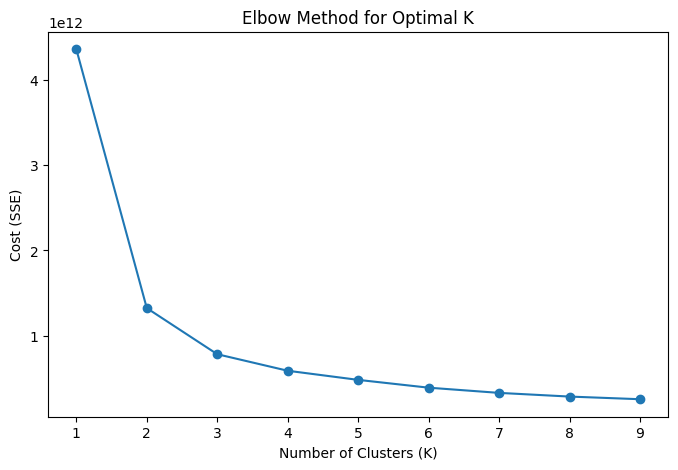

In [82]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

cost = []
K_range = range(1, 10)  # Coba beberapa nilai K

for K in K_range:
    kproto = KPrototypes(n_clusters=K, max_iter=20, random_state=42)
    kproto.fit_predict(marketing_df, categorical=[0, 2, 4])
    cost.append(kproto.cost_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, cost, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost (SSE)')
plt.show()


In [80]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_score
import numpy as np


# Pisahkan kolom numerik dan kategorikal
numerical_columns = marketing_df.select_dtypes(include=[np.number])
categorical_columns = marketing_df.select_dtypes(exclude=[np.number])

# One-Hot Encoding pada kolom kategorikal
encoder = OneHotEncoder()
categorical_encoded = encoder.fit_transform(categorical_columns).toarray()

# Gabungkan kembali kolom numerik dan kategorikal yang sudah di-encode
encoded_data = np.hstack((numerical_columns, categorical_encoded))

# Hitung Silhouette Score menggunakan data yang sudah di-encode
silhouette_avg = silhouette_score(encoded_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.467254743602404
